# Diamonds set : Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

_Content
1. price price in US dollars (\$326--\$18,823)
2. carat weight of the diamond (0.2--5.01)
3. cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. color diamond colour, from J (worst) to D (best)
5. clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. x length in mm (0--10.74)
7. y width in mm (0--58.9)
8. z depth in mm (0--31.8)
9. depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. table width of top of diamond relative to widest point (43--95)


In [2]:
diamonds=pd.read_csv("diamonds.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
diamonds.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


_Here as obvious we can see strong relation between the size(x,y,z), price and carrat. Apart from this we don't see any correlation_

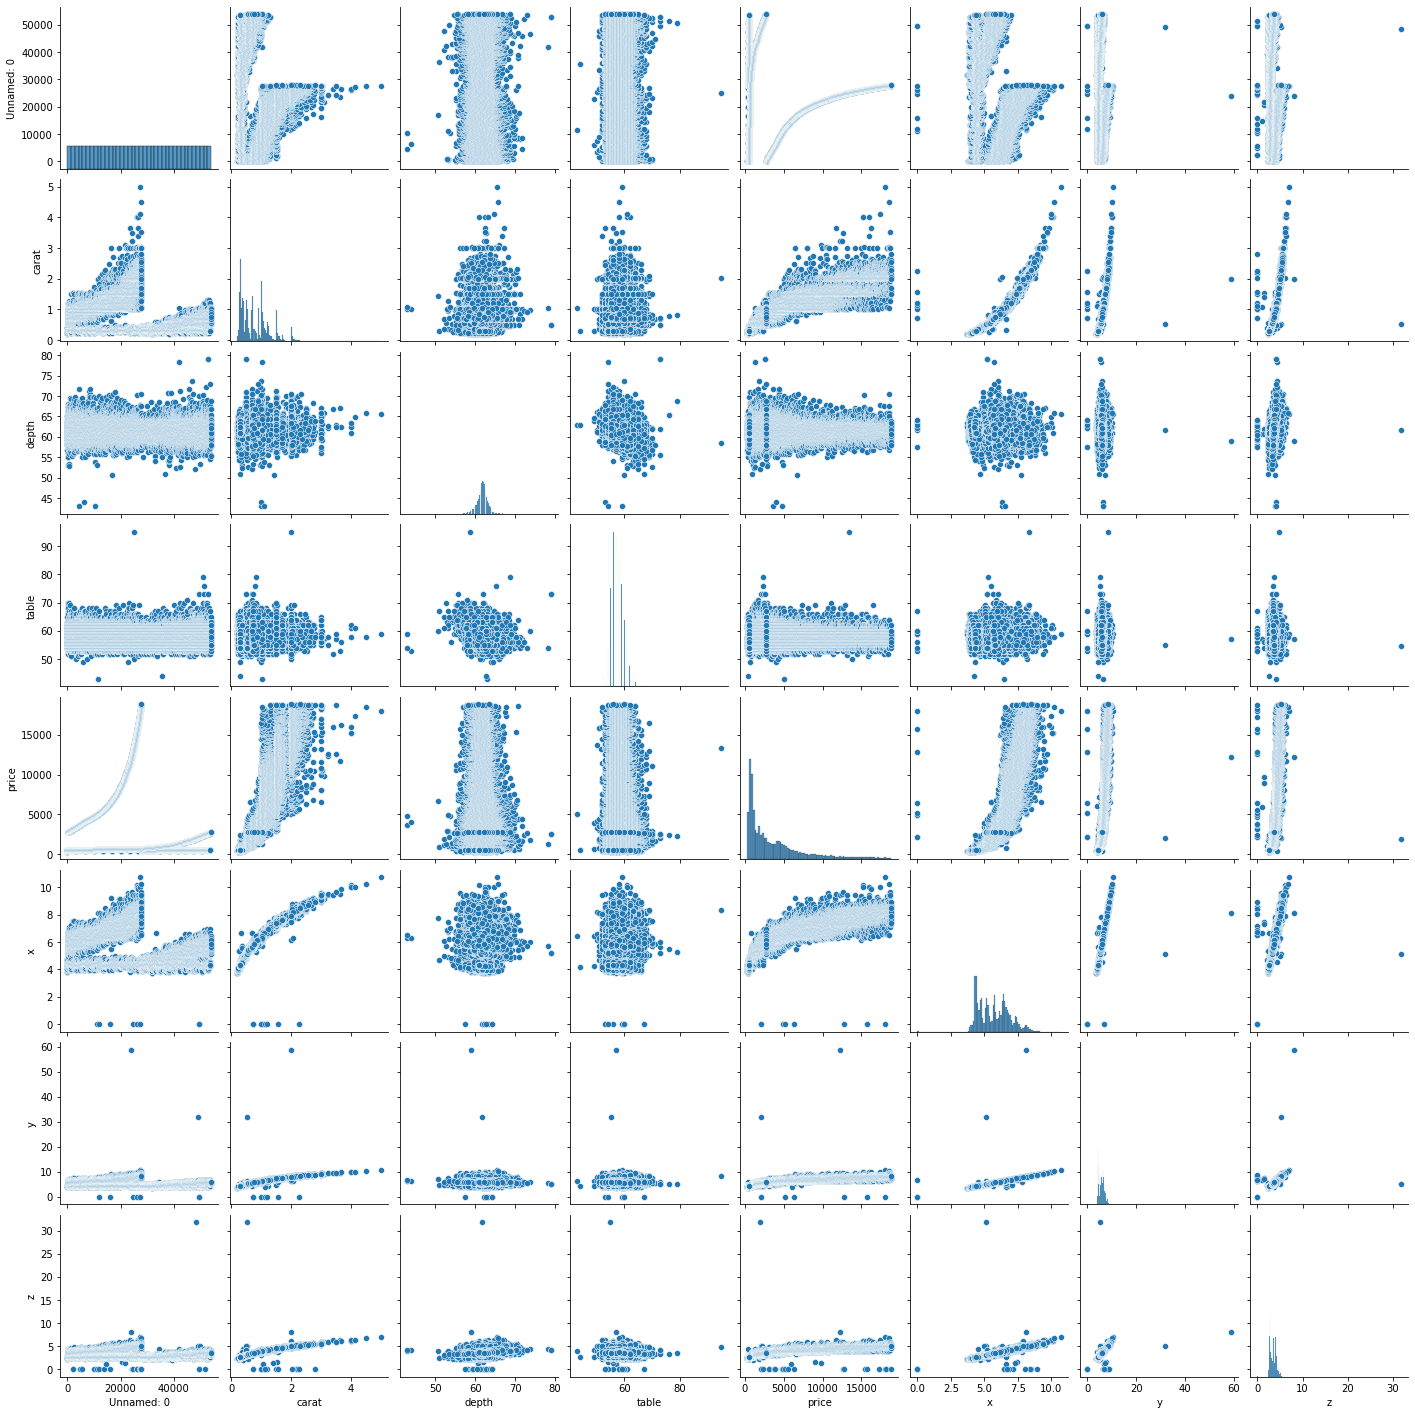

In [13]:
sns.pairplot(diamonds)

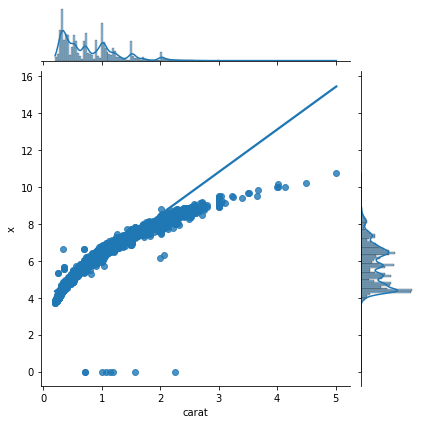

In [6]:
sns.jointplot(x='carat',y='x',data=diamonds,kind='reg')

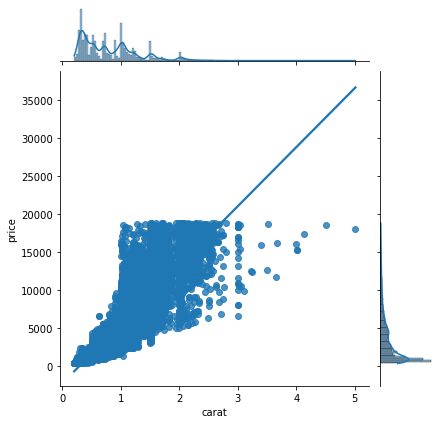

In [7]:
sns.jointplot(x='carat',y='price',data=diamonds,kind='reg')

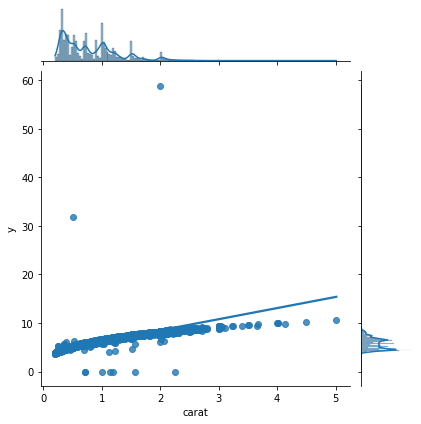

In [8]:
sns.jointplot(x='carat',y='y',data=diamonds,kind='reg')

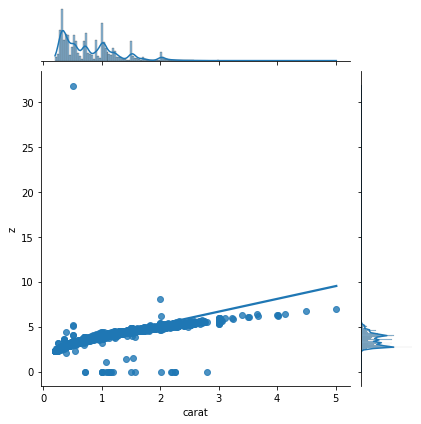

In [9]:
sns.jointplot(x='carat',y='z',data=diamonds,kind='reg')

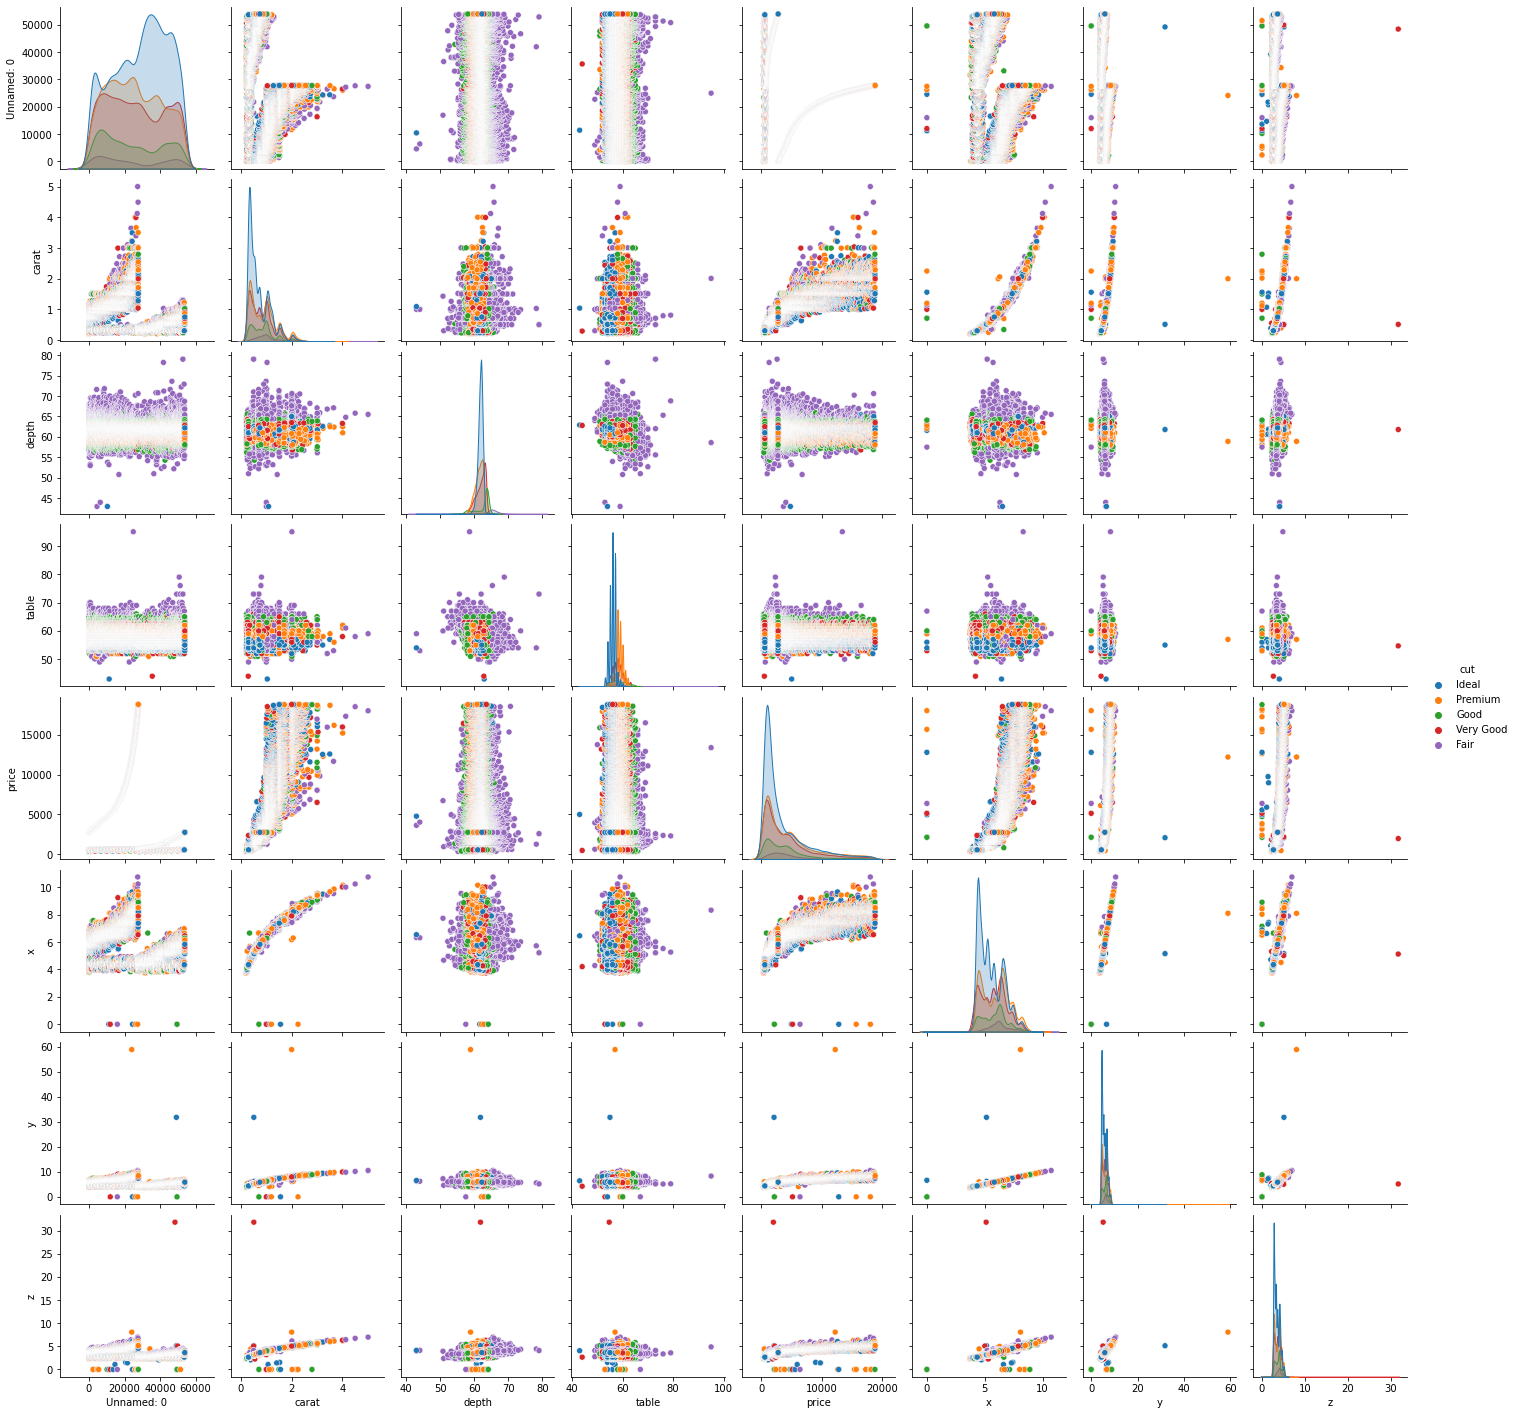

In [11]:
sns.pairplot(diamonds,hue='cut')

C:\Users\matin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

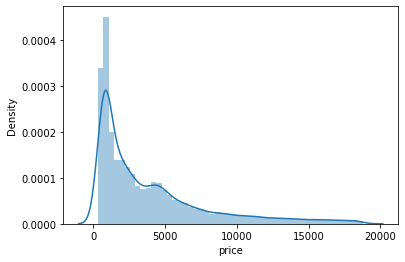

In [12]:
sns.distplot(diamonds['price'])

# Training and Testing Data
_Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets._

In [14]:
Y=diamonds['price']

In [25]:
X=diamonds.drop(['price','Unnamed: 0'],axis=1)

In [63]:
X1 = pd.get_dummies(X, columns = ['cut','color','clarity'])
X1.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [65]:
from sklearn import preprocessing
  
""" MIN MAX SCALER """
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
X2 = min_max_scaler.fit_transform(X1)

In [66]:
X2

array([[0.00623701, 0.51388889, 0.23076923, ..., 0.        , 0.        ,
        0.        ],
       [0.002079  , 0.46666667, 0.34615385, ..., 0.        , 0.        ,
        0.        ],
       [0.00623701, 0.38611111, 0.42307692, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1039501 , 0.55      , 0.32692308, ..., 0.        , 0.        ,
        0.        ],
       [0.13721414, 0.5       , 0.28846154, ..., 0.        , 0.        ,
        0.        ],
       [0.11434511, 0.53333333, 0.23076923, ..., 0.        , 0.        ,
        0.        ]])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.3,random_state=101)

# Training the Model
_Now its time to train our model on our training data!_

In [40]:
#Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [41]:
#Create an instance of a LinearRegression() model named lm.
lr = LinearRegression()

In [42]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [43]:
#Train/fit lm on the training data.
lr.fit(X_train,Y_train)

LinearRegression()

In [44]:
#Print out the coefficients of the model
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [11166.93956762   -40.82317249   -27.68257699  -874.43353825
    81.89274102  -325.95709925  -550.64106416   -21.22497736
   250.83719152   186.73656455   134.29228545   839.37296164
   622.75923108   551.24275454   346.34108077  -147.10085332
  -656.18624078 -1556.42893393 -3873.96113342  1509.30334973
  -148.037669   -1092.09370386   779.71288835   464.82623739
  1197.98108142  1162.2689494 ]


# Predicting Test Data
_Now that we have fit our model, let's evaluate its performance by predicting off the test values!_

_Use lm.predict() to predict off the X_test set of the data._


In [45]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

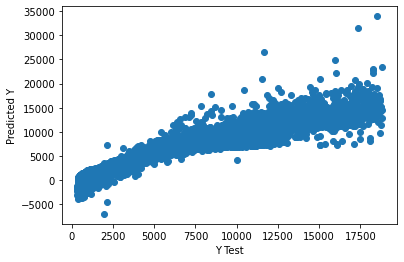

In [46]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model
_Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2)._

_Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error._



In [47]:
from sklearn import metrics

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 749.4642688109213
MSE: 1302377.659321084
RMSE: 1141.2176213681087


# Residuals
_Let's quickly explore the residuals to make sure everything was okay with our data._

#### Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

C:\Users\matin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


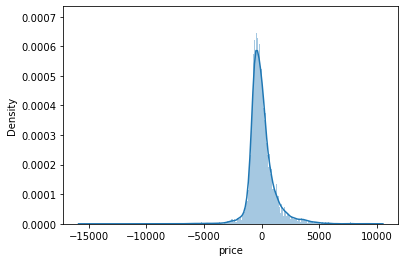

In [51]:
sns.distplot((Y_test-predictions),bins=1000);

In [52]:
coeffecients = pd.DataFrame(lr.coef_,X1.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
carat,11166.939568
depth,-40.823172
table,-27.682577
x,-874.433538
y,81.892741
z,-325.957099
cut_Fair,-550.641064
cut_Good,-21.224977
cut_Ideal,250.837192
cut_Premium,186.736565
